In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/pprab/Downloads/fetal_health.csv")

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
def assign_category(df):
    df.iloc[:, 21] = df.iloc[:, 21].astype('category')
    df.iloc[:, 21].cat.categories = ['Normal', 'Suspect', 'Pathological']
    return df
df = assign_category(df)

In [5]:
print(df.iloc[:, 21])

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2126, dtype: category
Categories (3, float64): [1.0, 2.0, 3.0]


In [6]:
df.iloc[:, 21].cat.categories = ['Normal', 'Suspect', 'Pathological']

In [7]:
print(df.iloc[:, 21])

0       Suspect
1        Normal
2        Normal
3        Normal
4        Normal
         ...   
2121    Suspect
2122    Suspect
2123    Suspect
2124    Suspect
2125     Normal
Name: fetal_health, Length: 2126, dtype: category
Categories (3, object): ['Normal', 'Suspect', 'Pathological']


In [8]:
print(df['fetal_health'].value_counts())
##data is imbalanced

Normal          1655
Suspect          295
Pathological     176
Name: fetal_health, dtype: int64


In [9]:
from imblearn.over_sampling import RandomOverSampler

In [10]:
# get the feature and target data
X = df[['fetal_health']]
y = df['fetal_health']

In [11]:
# create the oversampler object
oversampler = RandomOverSampler(sampling_strategy='auto')

In [12]:
# fit and transform the data using the oversampler
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [13]:
# create the new dataframe with the oversampled column

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

df_resampled = pd.DataFrame({'fetal_health': y_resampled})


In [14]:
# display the new value counts of each category
print(df_resampled['fetal_health'].value_counts())

Pathological    1655
Suspect         1655
Normal          1655
Name: fetal_health, dtype: int64


In [15]:
new_cols = ["base.val","accel", "fetal_move", "uter.cont", "light.decel", "sev.decel", "prolong.decel", "abn.short.var", "mean.short.var", "perc.tlong.var", "mean.long.var", "hist.width", "hist.min", "hist.max", "hist.npeaks", "hist.n0", "hist.mode", "hist.mean", "hist.median", "hist.var", "hist.tend", "fetal_health"]

In [16]:
# assign the new column names to the dataframe
df.columns = new_cols

In [17]:
# print the updated column names
print(df.columns)

Index(['base.val', 'accel', 'fetal_move', 'uter.cont', 'light.decel',
       'sev.decel', 'prolong.decel', 'abn.short.var', 'mean.short.var',
       'perc.tlong.var', 'mean.long.var', 'hist.width', 'hist.min', 'hist.max',
       'hist.npeaks', 'hist.n0', 'hist.mode', 'hist.mean', 'hist.median',
       'hist.var', 'hist.tend', 'fetal_health'],
      dtype='object')


In [18]:
df.head()

,base.val,accel,fetal_move,uter.cont,light.decel,sev.decel,prolong.decel,abn.short.var,mean.short.var,perc.tlong.var,...,hist.min,hist.max,hist.npeaks,hist.n0,hist.mode,hist.mean,hist.median,hist.var,hist.tend,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,Suspect
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,Normal
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,Normal
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,Normal
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,Normal


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3, random_state=42)

In [21]:
corr_matrix = X_train.corr()

print(corr_matrix)

                base.val     accel  fetal_move  uter.cont  light.decel  \
base.val        1.000000 -0.073491   -0.042268  -0.149530    -0.164699   
accel          -0.073491  1.000000    0.039461   0.083897    -0.107574   
fetal_move     -0.042268  0.039461    1.000000  -0.078441     0.047236   
uter.cont      -0.149530  0.083897   -0.078441   1.000000     0.301320   
light.decel    -0.164699 -0.107574    0.047236   0.301320     1.000000   
sev.decel      -0.053652 -0.047597   -0.012356   0.007972     0.114313   
prolong.decel  -0.100499 -0.138971    0.301578   0.053585     0.221756   
abn.short.var   0.301406 -0.273024   -0.110819  -0.235241    -0.128590   
mean.short.var -0.300242  0.203232    0.123301   0.288733     0.554838   
perc.tlong.var  0.301423 -0.368685   -0.080567  -0.293267    -0.260579   
mean.long.var  -0.054246 -0.134580    0.031632  -0.068726    -0.250178   
hist.width     -0.160780  0.293651    0.171365   0.143504     0.519341   
hist.min        0.375685 -0.147622   -

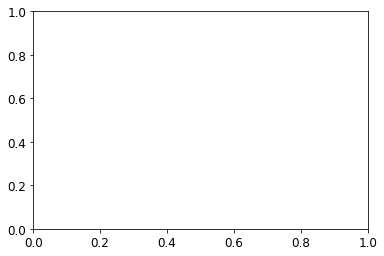

<AxesSubplot:>

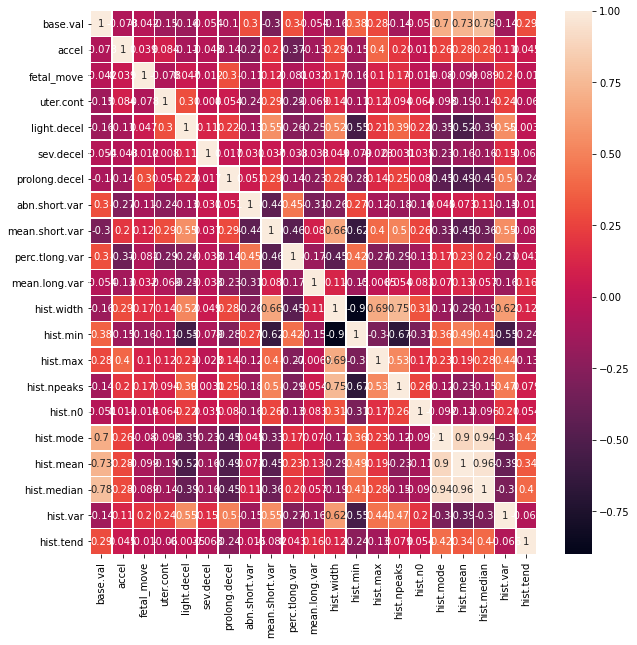

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()

# Set figure size
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr_matrix, annot=True, linewidths=.5, ax=ax)

In [23]:
#Methods

In [24]:
from sklearn.linear_model import LogisticRegression

# Assume X_train and y_train are your training data and target variable
# Create an instance of the logistic regression model with multinomial distribution
model = LogisticRegression(multi_class='multinomial', solver='newton-cg', max_iter=1000)


In [25]:
# Fit the model on the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='newton-cg')

In [26]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[471   6  19]
 [  1  36   4]
 [ 31   9  61]]


In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Normal       0.94      0.95      0.94       496
Pathological       0.71      0.88      0.78        41
     Suspect       0.73      0.60      0.66       101

    accuracy                           0.89       638
   macro avg       0.79      0.81      0.80       638
weighted avg       0.89      0.89      0.89       638



In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

      Normal       0.94      0.95      0.94       496
Pathological       0.71      0.88      0.78        41
     Suspect       0.73      0.60      0.66       101

    accuracy                           0.89       638
   macro avg       0.79      0.81      0.80       638
weighted avg       0.89      0.89      0.89       638



In [20]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test, y_pred)
print('Kappa:', kappa)

Kappa: 0.7902088704161625


In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier object with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
from sklearn.metrics import classification_report

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

      Normal       0.92      0.94      0.93       496
Pathological       0.78      0.78      0.78        41
     Suspect       0.67      0.57      0.62       101

    accuracy                           0.87       638
   macro avg       0.79      0.77      0.78       638
weighted avg       0.87      0.87      0.87       638



In [32]:
kappa = cohen_kappa_score(y_test, y_pred)
print('Kappa:', kappa)

Kappa: 0.6446078431372549


In [33]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier object
dt = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
from sklearn.metrics import classification_report

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

      Normal       0.96      0.97      0.96       496
Pathological       0.89      0.95      0.92        41
     Suspect       0.86      0.80      0.83       101

    accuracy                           0.94       638
   macro avg       0.90      0.91      0.90       638
weighted avg       0.94      0.94      0.94       638



In [35]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


In [36]:
from sklearn.tree import export_graphviz
import graphviz

In [37]:
# Export the decision tree as a dot file
dot_data = export_graphviz(dt, out_file=None,
                           feature_names=X_train.columns,
                           class_names=y_train.unique(),
                           filled=True, rounded=True,
                           special_characters=True)

In [38]:
# Visualize the decision tree
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [39]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# Create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [40]:
!where python

C:\Users\pprab\Anaconda3\envs\myvenv\python.exe
C:\Users\pprab\AppData\Local\Microsoft\WindowsApps\python.exe


In [41]:
# Create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [42]:
# Fit the model to the training data
rf.fit(X_train, y_train)

# Predict the class labels for the testing data
y_pred = rf.predict(X_test)

In [43]:
# Evaluate the model performance on the testing data
accuracy = rf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9435736677115988


In [44]:
# Get the confusion matrix for the testing data
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[487   2   7]
 [  2  38   1]
 [ 21   3  77]]


In [45]:
# Get Cohen's kappa coefficient for the testing data
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's kappa: {kappa}")

Cohen's kappa: 0.840207046251461


In [46]:
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)
# Get the classification report for the testing data
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      Normal       0.95      0.98      0.97       496
Pathological       0.88      0.93      0.90        41
     Suspect       0.91      0.76      0.83       101

    accuracy                           0.94       638
   macro avg       0.91      0.89      0.90       638
weighted avg       0.94      0.94      0.94       638



In [47]:
from sklearn.ensemble import BaggingClassifier
# Create a bagging classifier with 100 base estimators
bagging = BaggingClassifier(base_estimator=dt, n_estimators=100, random_state=42)

# Fit the model to the training data
bagging.fit(X_train, y_train)

# Predict the class labels for the testing data
y_pred = bagging.predict(X_test)

# Evaluate the model performance on the testing data
accuracy = bagging.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

C:\Users\pprab\Anaconda3\envs\myvenv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.9467084639498433


In [48]:
# Get the confusion matrix for the testing data
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[481   5  10]
 [  3  38   0]
 [ 15   1  85]]


In [49]:
# Get Cohen's kappa coefficient for the testing data
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's kappa: {kappa}")

Cohen's kappa: 0.8535719348458564


In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from timeit import default_timer as timer
from sklearn.metrics import confusion_matrix


In [6]:
# reload the dataset
df = assign_category(df)
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3, random_state=42)



In [7]:
# Scale the features to have zero mean and unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)


In [ ]:
tune_grid = {'hidden_layer_sizes': list(range(1, 16)),
             'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]}

nn = MLPClassifier(activation='logistic', solver='lbfgs', max_iter=1000, random_state=123)

tuned_nn = GridSearchCV(nn, tune_grid, cv=2, scoring='accuracy')

start = timer()
tuned_nn.fit(X_train_scaled, y_train)

print('Total elapsed time:', timer() - start)

# Predict the class labels for the test data
y_pred = tuned_nn.predict(X_test_transformed)

In [14]:
# Evaluate the model on the testing data
score = tuned_nn.score(X_test_transformed, y_test)
print('Accuracy: {:.2f}%'.format(score*100))

Accuracy: 92.16%


In [18]:
# Scale the test features using the same scaler used on the training data
X_test_transformed = scaler.transform(X_test)

# Predict the class labels for the test data
y_pred = tuned_nn.predict(X_test_transformed)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix:')
print(cm)

Confusion matrix:
[[472   4  20]
 [  3  38   0]
 [ 15   8  78]]


In [19]:
# Get Cohen's kappa coefficient for the testing data
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's kappa: {kappa}")

NameError: name 'cohen_kappa_score' is not defined